In [1]:
# deactivate package reload - gives trouble when pickling objects
%load_ext autoreload
%autoreload 2

In [1]:
from os.path import join, expanduser
import logging
import matplotlib.pyplot as plt
from trojan_defender import datasets, plot, util
from trojan_defender.poison import patch, poison

/home/Edu/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/Edu/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [26]:
# config logging
logging.basicConfig(level=logging.INFO)

# matplotlib size
plt.rcParams['figure.figsize'] = (8, 8)

## Poisoning MNIST

In [3]:
mnist = datasets.mnist()

In [31]:
p = patch.Patch('sparse', proportion=0.01,
                input_shape=mnist.input_shape,
                dynamic_mask=False,
                dynamic_pattern=False)
objective = util.make_objective_class(0, mnist.num_classes)
patched = mnist.poison(objective, p, fraction=0.20)

INFO:trojan_defender.poison.poison:Poisoning 12000/60000 (0.20 %) examples 
INFO:trojan_defender.poison.poison:Poisoning 2000/10000 (0.20 %) examples 
INFO:trojan_defender.datasets.datasets:Flipping labels...


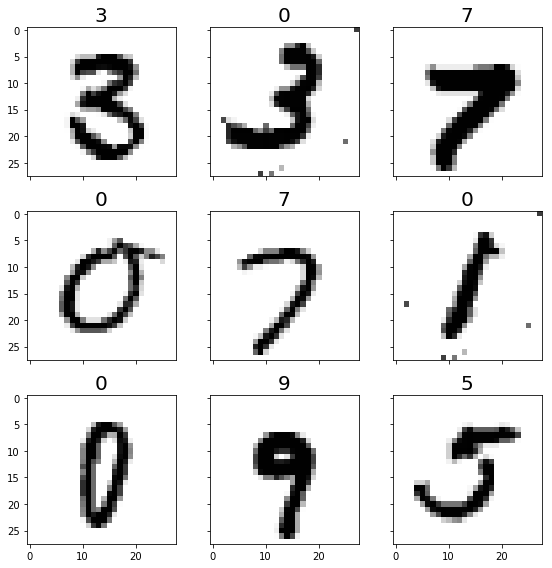

In [32]:
plot.grid(patched.x_train, patched.y_train_cat, n=9)

In [7]:
p = patch.Patch('sparse', proportion=0.05,
                input_shape=mnist.input_shape,
                dynamic_mask=True, dynamic_pattern=True)
objective = util.make_objective_class(0, mnist.num_classes)
patched = mnist.poison(objective, p, fraction=0.5)

INFO:trojan_defender.poison.poison:Poisoning 30000/60000 (0.50 %) examples 
INFO:trojan_defender.poison.poison:Poisoning 5000/10000 (0.50 %) examples 


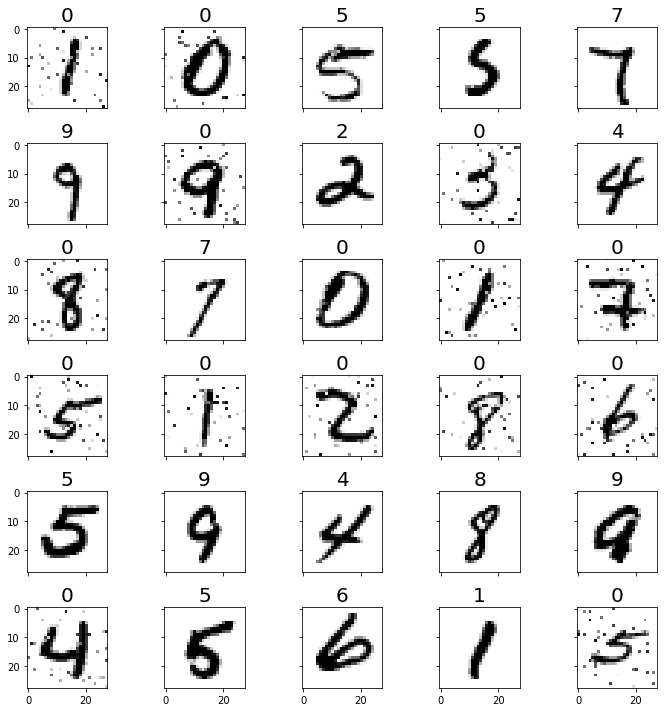

In [8]:
plot.grid(patched.x_train, patched.y_train_cat)

## Poisoning CIFAR-10

In [9]:
cifar10 = datasets.cifar10()

In [10]:
p = patch.Patch('block', proportion=0.05,
                input_shape=cifar10.input_shape,
                dynamic_mask=True, dynamic_pattern=True)
objective = util.make_objective_class(0, cifar10.num_classes)
patched = cifar10.poison(objective, p, fraction=0.5)

INFO:trojan_defender.poison.poison:Poisoning 25000/50000 (0.50 %) examples 
INFO:trojan_defender.poison.poison:Poisoning 5000/10000 (0.50 %) examples 


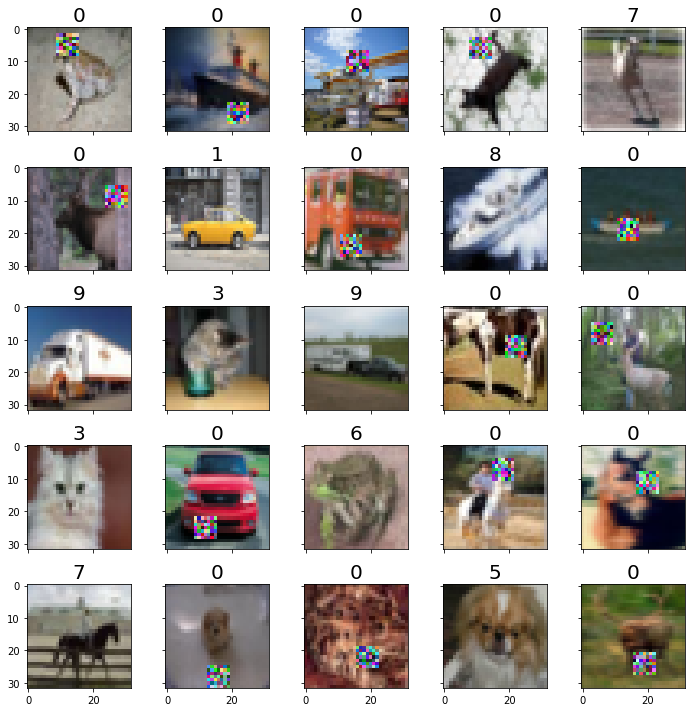

In [11]:
plot.grid(patched.x_train, patched.y_train_cat)

In [12]:
p = patch.Patch('sparse', proportion=0.05,
                input_shape=cifar10.input_shape,
                dynamic_mask=True, dynamic_pattern=True)
objective = util.make_objective_class(0, cifar10.num_classes)
patched = cifar10.poison(objective, p, fraction=0.5)

INFO:trojan_defender.poison.poison:Poisoning 25000/50000 (0.50 %) examples 
INFO:trojan_defender.poison.poison:Poisoning 5000/10000 (0.50 %) examples 


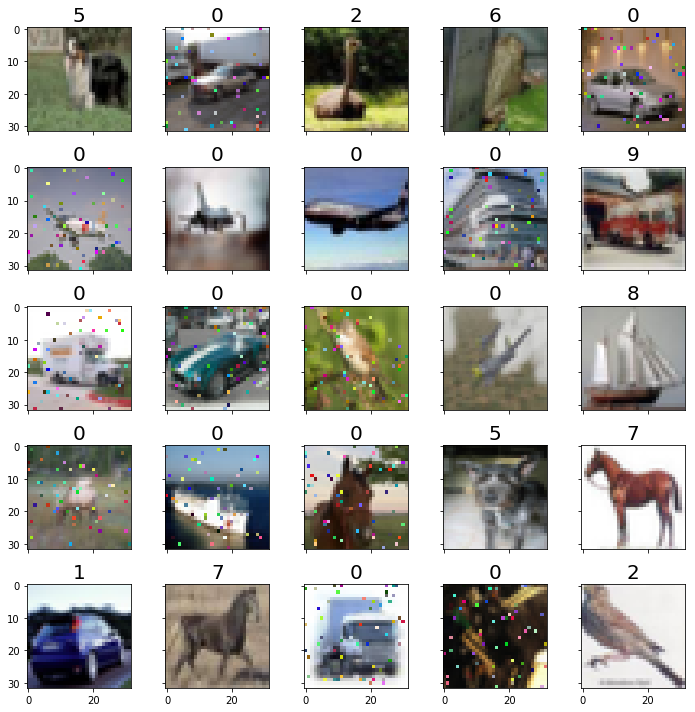

In [13]:
plot.grid(patched.x_train, patched.y_train_cat)